In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# cargar los datos
df = pd.read_csv("/content/drive/MyDrive/Modelos Predictivos/Proyecto/yellow_tripdata_2016-03.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [3]:
df.shape[0]

12210952

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [5]:
print(df.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


In [6]:
df = df.dropna()

Variables Númericas

In [7]:
columns_to_exclude = ['VendorID', 'pickup_longitude', 'pickup_latitude',
                      'dropoff_longitude', 'dropoff_latitude', 'payment_type',
                      'RatecodeID']

numerical_columns = df.select_dtypes(include=["float64","int64"]).columns

numerical_columns = numerical_columns.difference(columns_to_exclude)

statistics = df[numerical_columns].agg(['mean', 'median', 'std', 'var', 'min', 'max', 'skew', 'kurt']).transpose()
statistics.rename(columns={
    "mean": "Mean",
    "median": "Median",
    "std": "Standard Deviation",
    "var": "Variance",
    "min": "Minimum",
    "max": "Maximum",
    "skew": "Skewness",
    "kurt": "Kurtosis"
}, inplace=True)

print("\nMedidas de tendencia central y dispersión:\n", statistics)


Medidas de tendencia central y dispersión:
                             Mean  Median  Standard Deviation      Variance  \
extra                   0.345560    0.00            0.456307  2.082160e-01   
fare_amount            12.795078    9.50          134.097923  1.798225e+04   
improvement_surcharge   0.299720    0.30            0.012306  1.514491e-04   
mta_tax                 0.497636    0.50            0.048633  2.365187e-03   
passenger_count         1.659580    1.00            1.312189  1.721841e+00   
tip_amount              1.792582    1.35            2.549124  6.498034e+00   
tolls_amount            0.315255    0.00            1.751526  3.067844e+00   
total_amount           16.045820   11.80          134.357773  1.805201e+04   
trip_distance           6.131770    1.70         6156.482645  3.790228e+07   

                       Minimum      Maximum     Skewness      Kurtosis  
extra                   -58.50        80.00     4.084671  2.164568e+02  
fare_amount            -376.

In [8]:
df_negativo = df[df["tip_amount"]==0]

In [9]:
df_negativo.count()

,0
VendorID,4388626
tpep_pickup_datetime,4388626
tpep_dropoff_datetime,4388626
passenger_count,4388626
trip_distance,4388626
pickup_longitude,4388626
pickup_latitude,4388626
RatecodeID,4388626
store_and_fwd_flag,4388626
dropoff_longitude,4388626


Histogramas

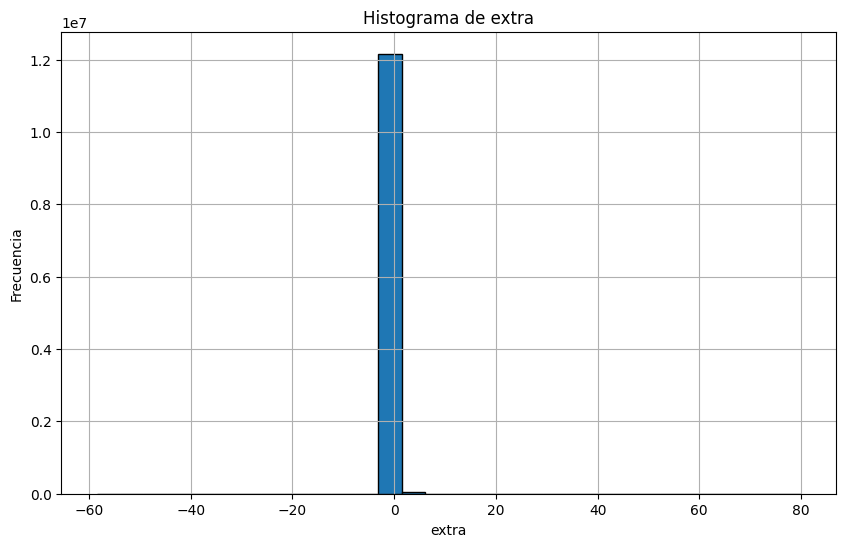

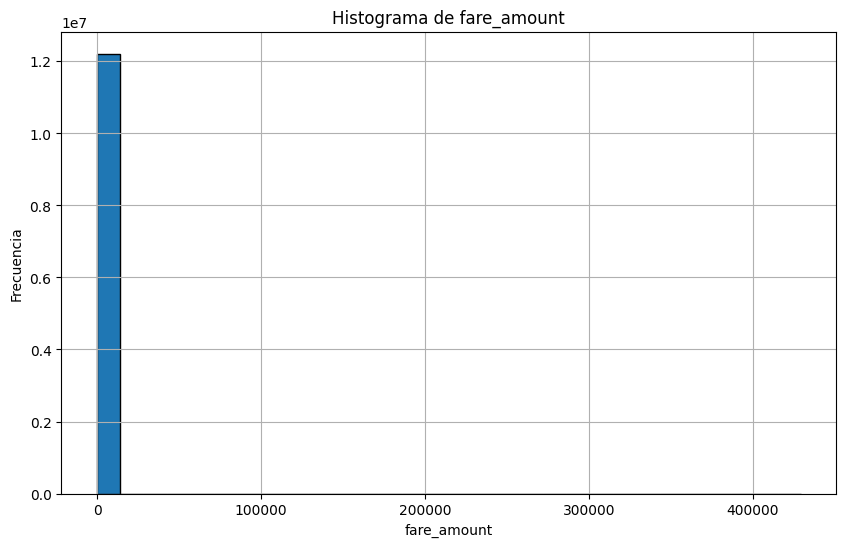

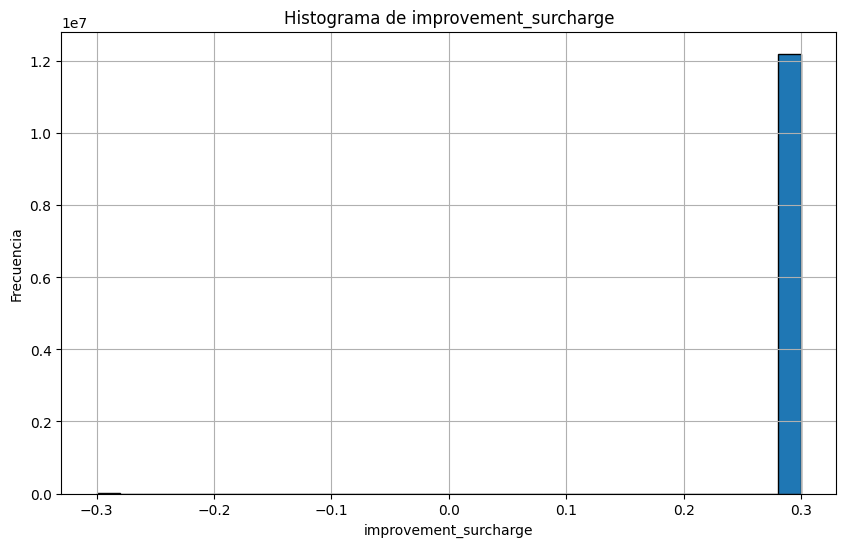

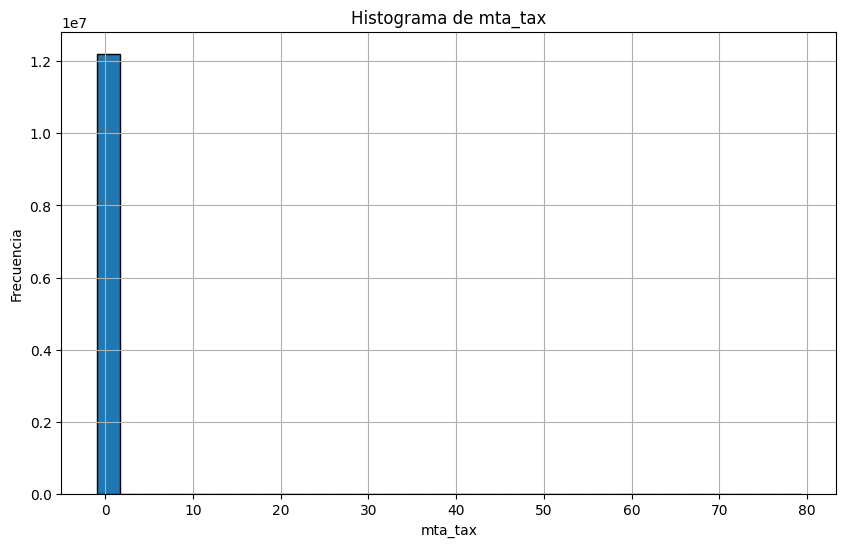

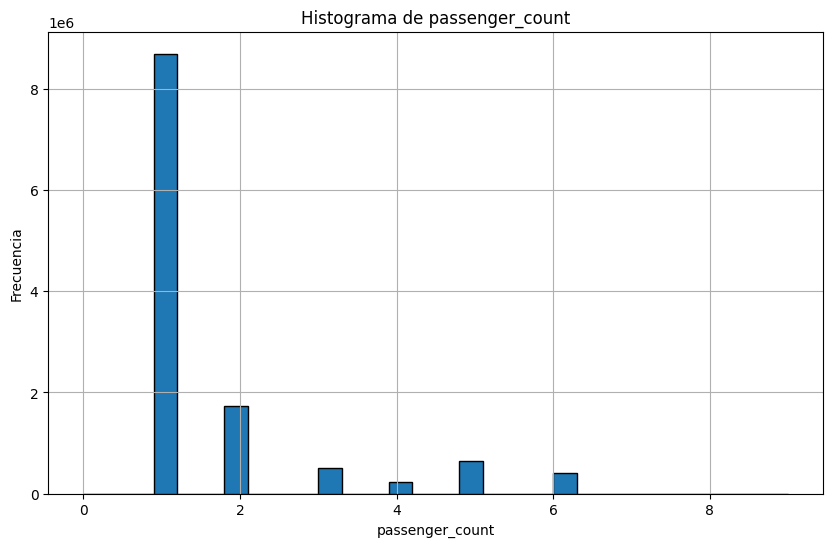

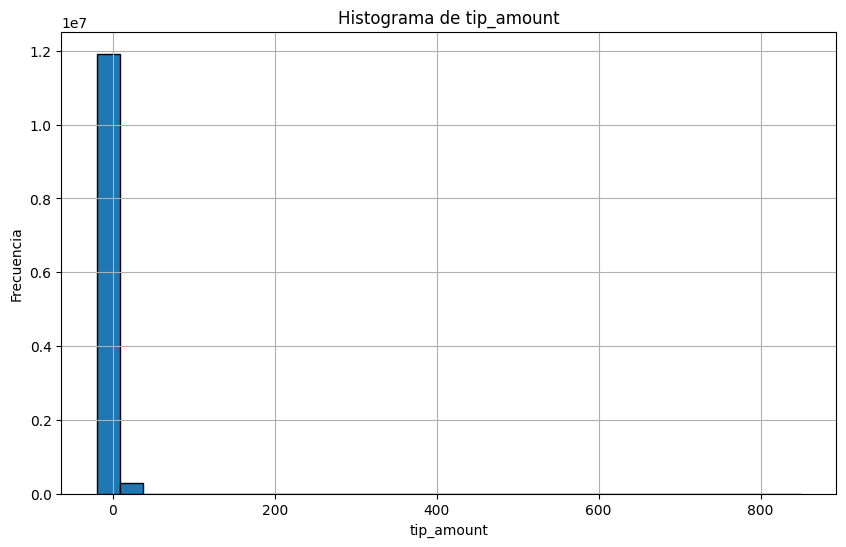

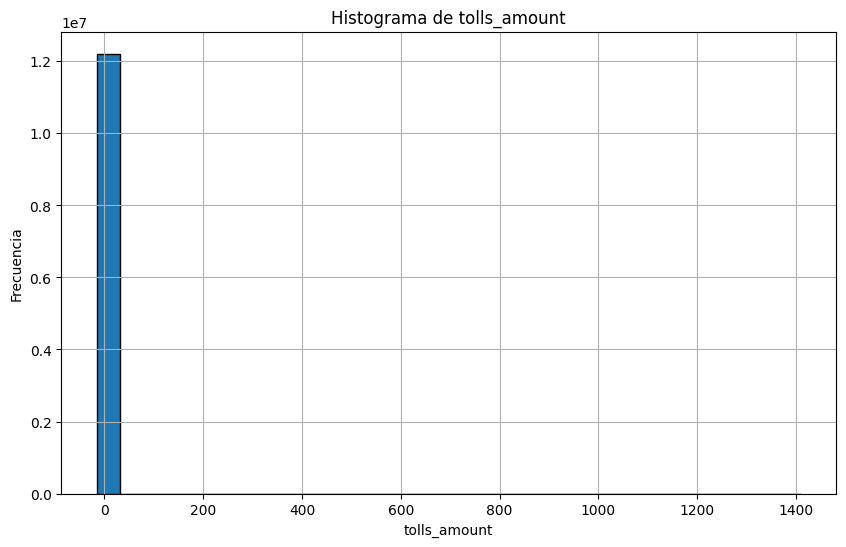

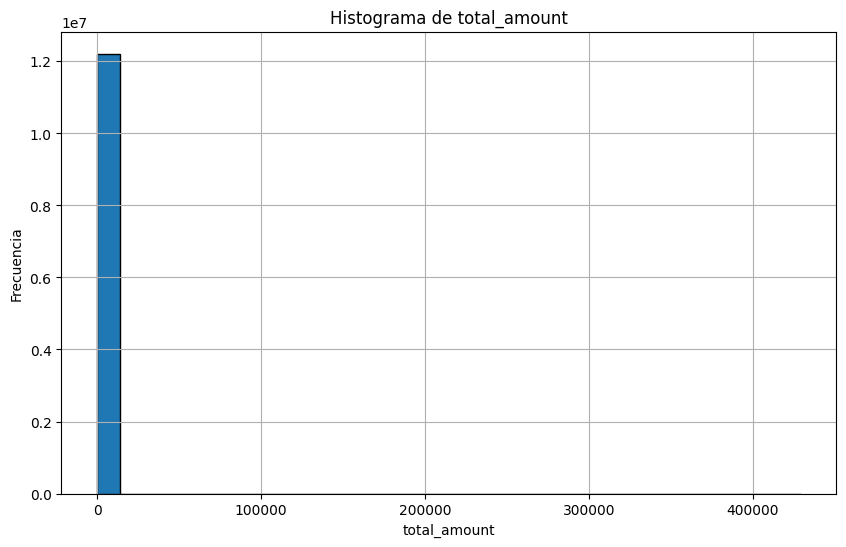

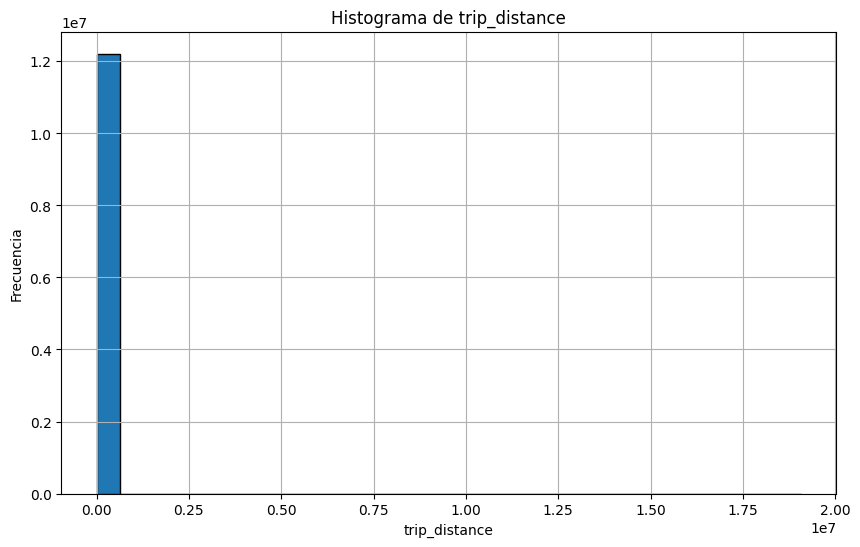

In [10]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

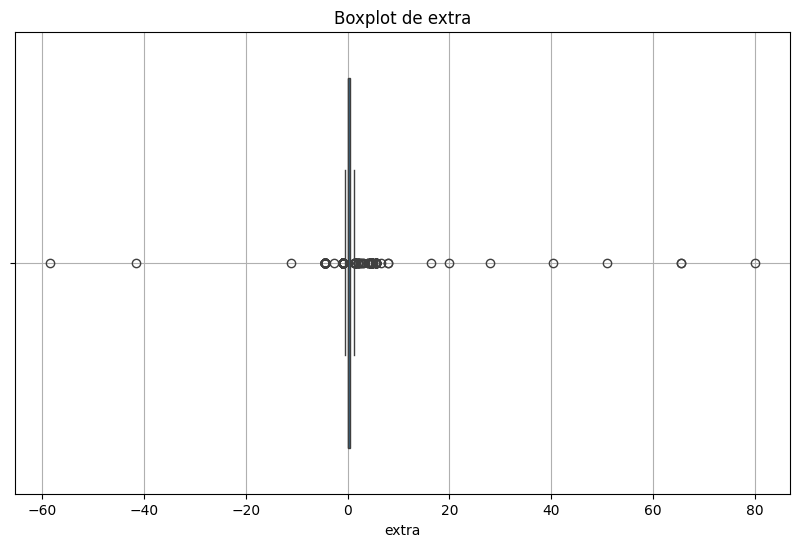

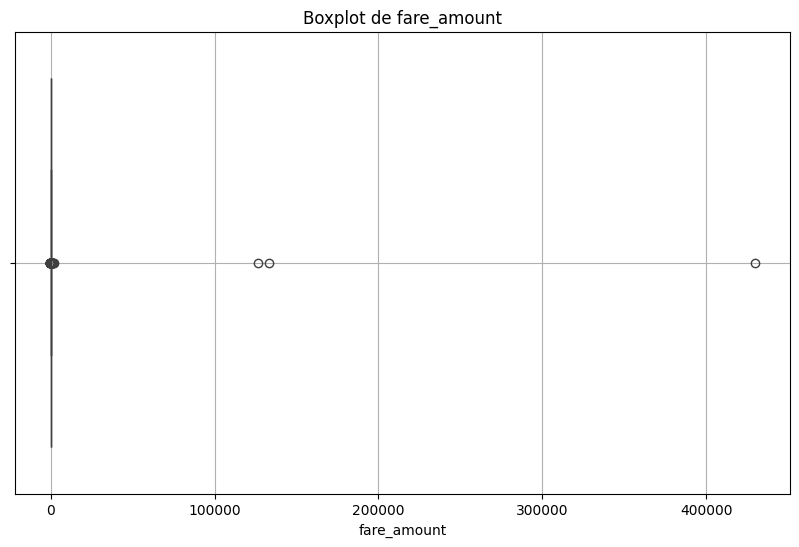

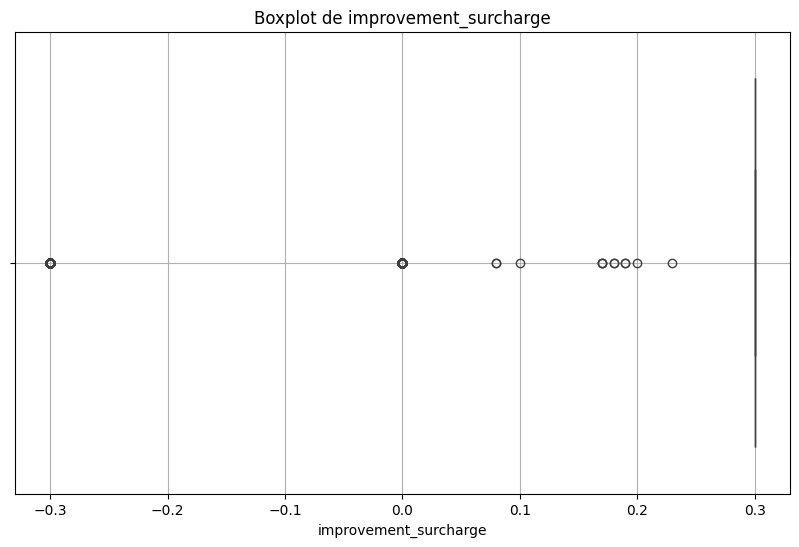

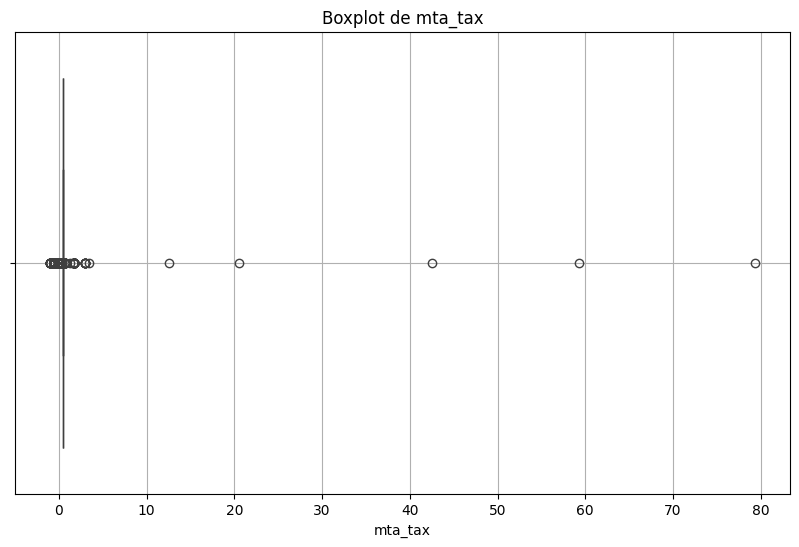

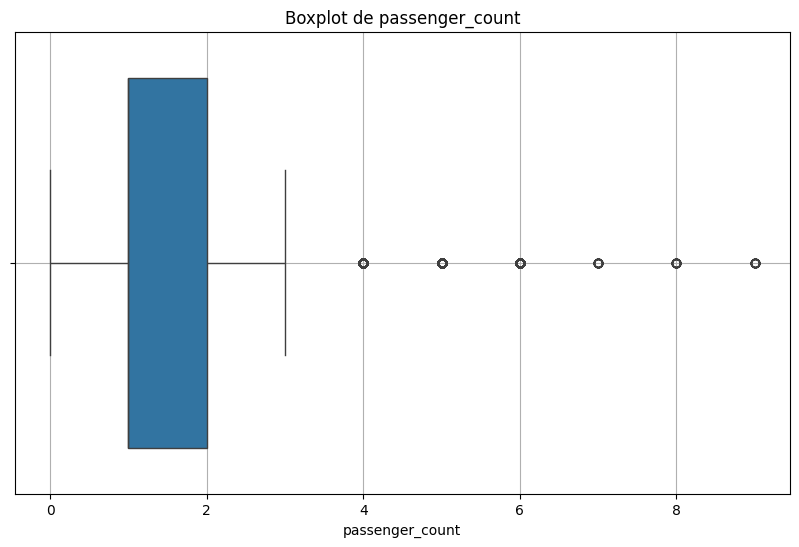

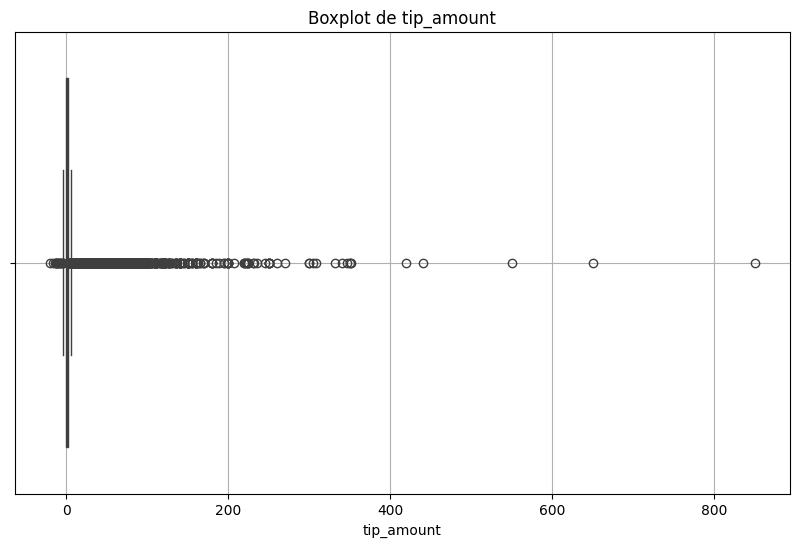

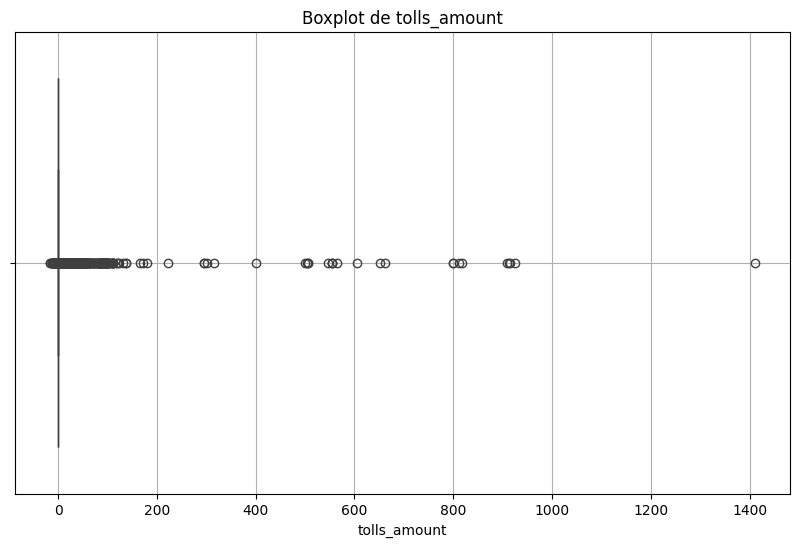

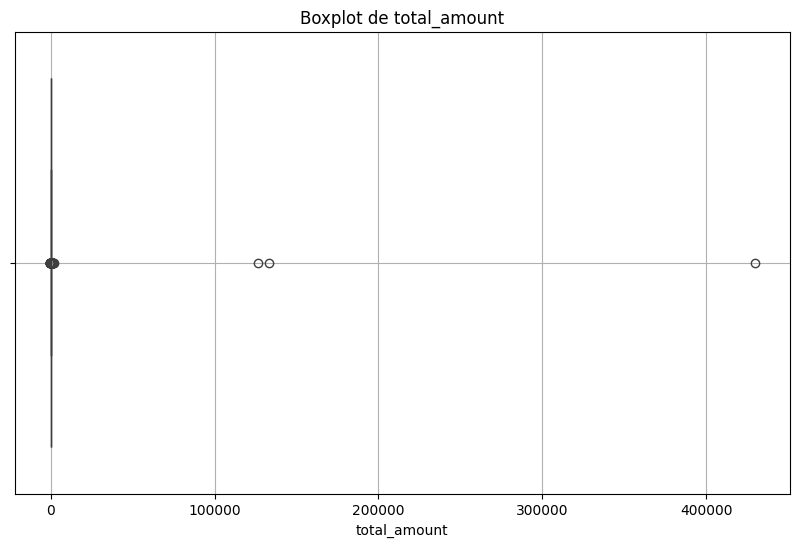

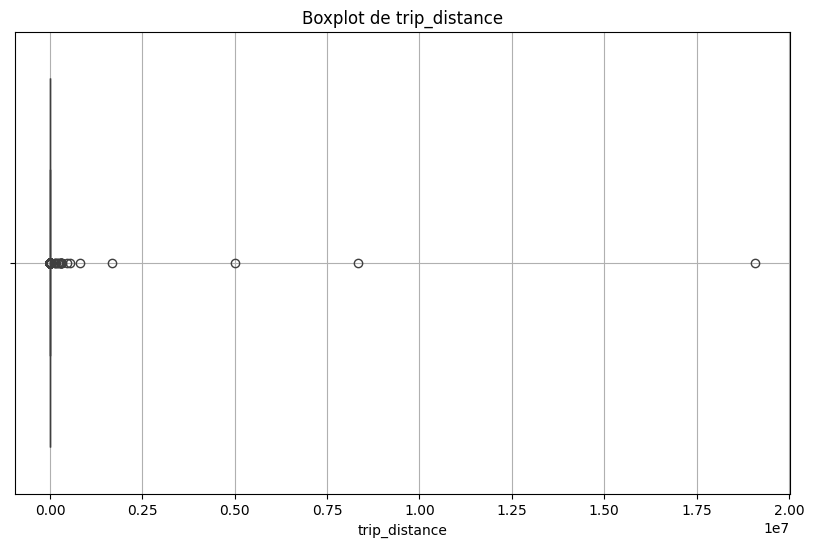

In [11]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

In [57]:
print(df['fare_amount'].quantile(0.01))

3.5


In [12]:
percentil_99 = df['fare_amount'].quantile(0.99)

# Igualar los valores superiores al percentil 99
df['fare_amount'] = df['fare_amount'].apply(lambda x: min(x, percentil_99))

# Verificar los primeros valores después de la transformación
print(df['fare_amount'].head())

0     9.0
1    11.0
2    52.0
3    31.5
4    52.0
Name: fare_amount, dtype: float64


In [13]:
percentil_1 = df['fare_amount'].quantile(0.01)

# Igualar los valores inferiores al percentil 1
df['fare_amount'] = df['fare_amount'].apply(lambda x: max(x, percentil_1))

# Verificar los primeros valores después de la transformación
print(df['fare_amount'].head())

0     9.0
1    11.0
2    52.0
3    31.5
4    52.0
Name: fare_amount, dtype: float64


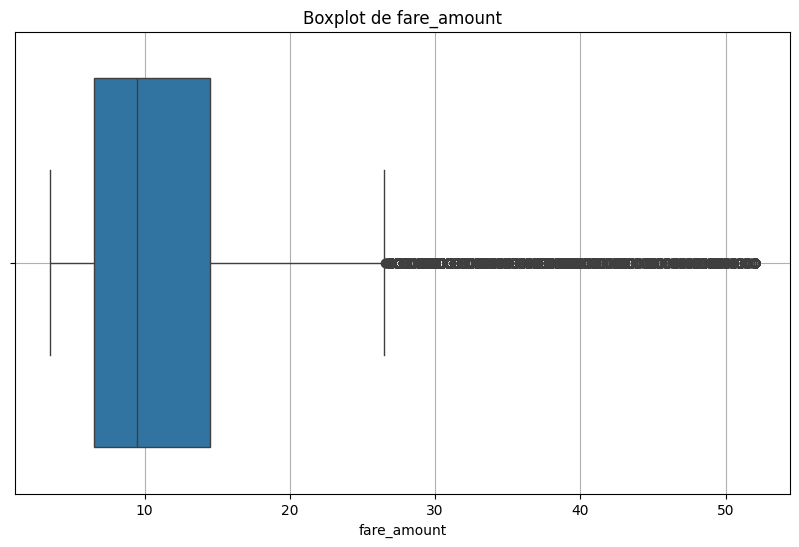

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot de fare_amount')
plt.xlabel('fare_amount')
plt.grid(True)
plt.show()

tip_amount

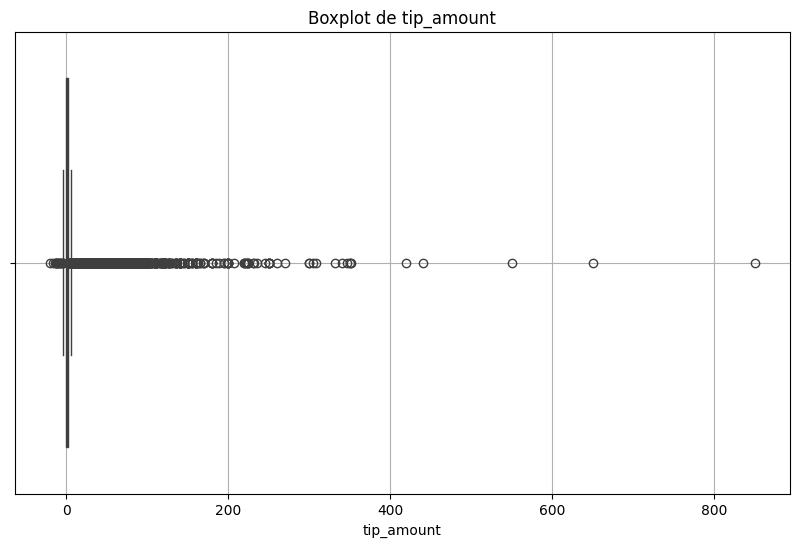

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tip_amount'])
plt.title('Boxplot de tip_amount')
plt.xlabel('tip_amount')
plt.grid(True)
plt.show()

In [71]:
print(df['tip_amount'].quantile(0.01))

0.0


In [16]:
percentil_99 = df['tip_amount'].quantile(0.99)

# Igualar los valores superiores al percentil 99
df['tip_amount'] = df['tip_amount'].apply(lambda x: min(x, percentil_99))

# Verificar los primeros valores después de la transformación
print(df['tip_amount'].head())

0    2.05
1    3.05
2    8.00
3    3.78
4    0.00
Name: tip_amount, dtype: float64


In [17]:
percentil_1 = df['tip_amount'].quantile(0.01)

# Igualar los valores inferiores al percentil 1
df['tip_amount'] = df['tip_amount'].apply(lambda x: max(x, percentil_1))

# Verificar los primeros valores después de la transformación
print(df['tip_amount'].head())

0    2.05
1    3.05
2    8.00
3    3.78
4    0.00
Name: tip_amount, dtype: float64


tolls_amount

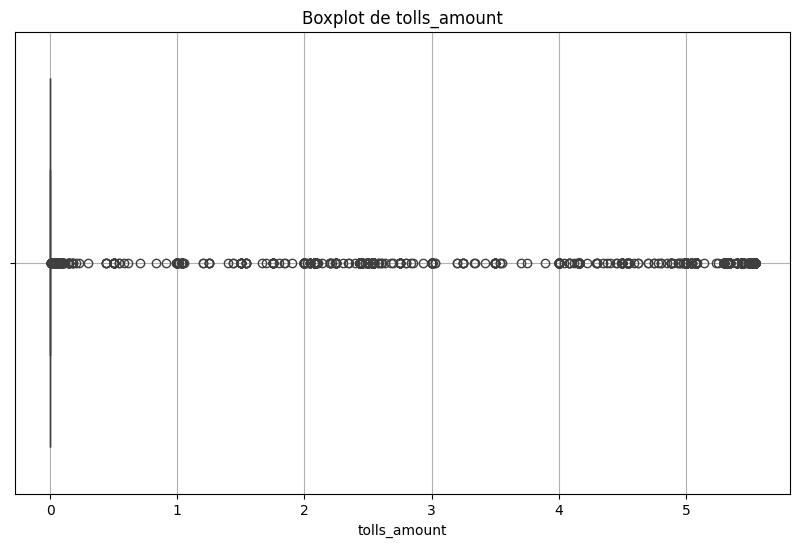

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tolls_amount'])
plt.title('Boxplot de tolls_amount')
plt.xlabel('tolls_amount')
plt.grid(True)
plt.show()

In [79]:
print(df['tolls_amount'].quantile(0.01))

0.0


In [18]:
percentil_99 = df['tolls_amount'].quantile(0.99)

# Igualar los valores superiores al percentil 99
df['tolls_amount'] = df['tolls_amount'].apply(lambda x: min(x, percentil_99))

# Verificar los primeros valores después de la transformación
print(df['tolls_amount'].head())

0    0.00
1    0.00
2    0.00
3    5.54
4    5.54
Name: tolls_amount, dtype: float64


In [19]:
percentil_1 = df['tolls_amount'].quantile(0.01)

# Igualar los valores inferiores al percentil 1
df['tolls_amount'] = df['tolls_amount'].apply(lambda x: max(x, percentil_1))

# Verificar los primeros valores después de la transformación
print(df['tolls_amount'].head())

0    0.00
1    0.00
2    0.00
3    5.54
4    5.54
Name: tolls_amount, dtype: float64


Variable Objetivo

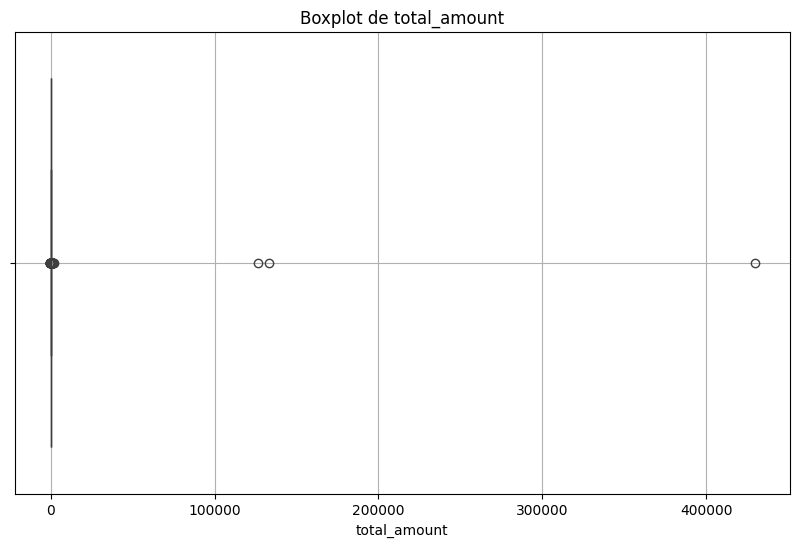

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_amount'])
plt.title('Boxplot de total_amount')
plt.xlabel('total_amount')
plt.grid(True)
plt.show()

In [84]:
print(df['total_amount'].quantile(0.99))

70.01


In [21]:
percentil_99 = df['total_amount'].quantile(0.99)

# Igualar los valores superiores al percentil 99
df['total_amount'] = df['total_amount'].apply(lambda x: min(x, percentil_99))

# Verificar los primeros valores después de la transformación
print(df['total_amount'].head())

0    12.35
1    15.35
2    63.80
3    41.62
4    70.01
Name: total_amount, dtype: float64


## Eliminación de valores menores o iguales a cero de la variable objetivo

In [22]:
df = df[df['total_amount'] > 0]

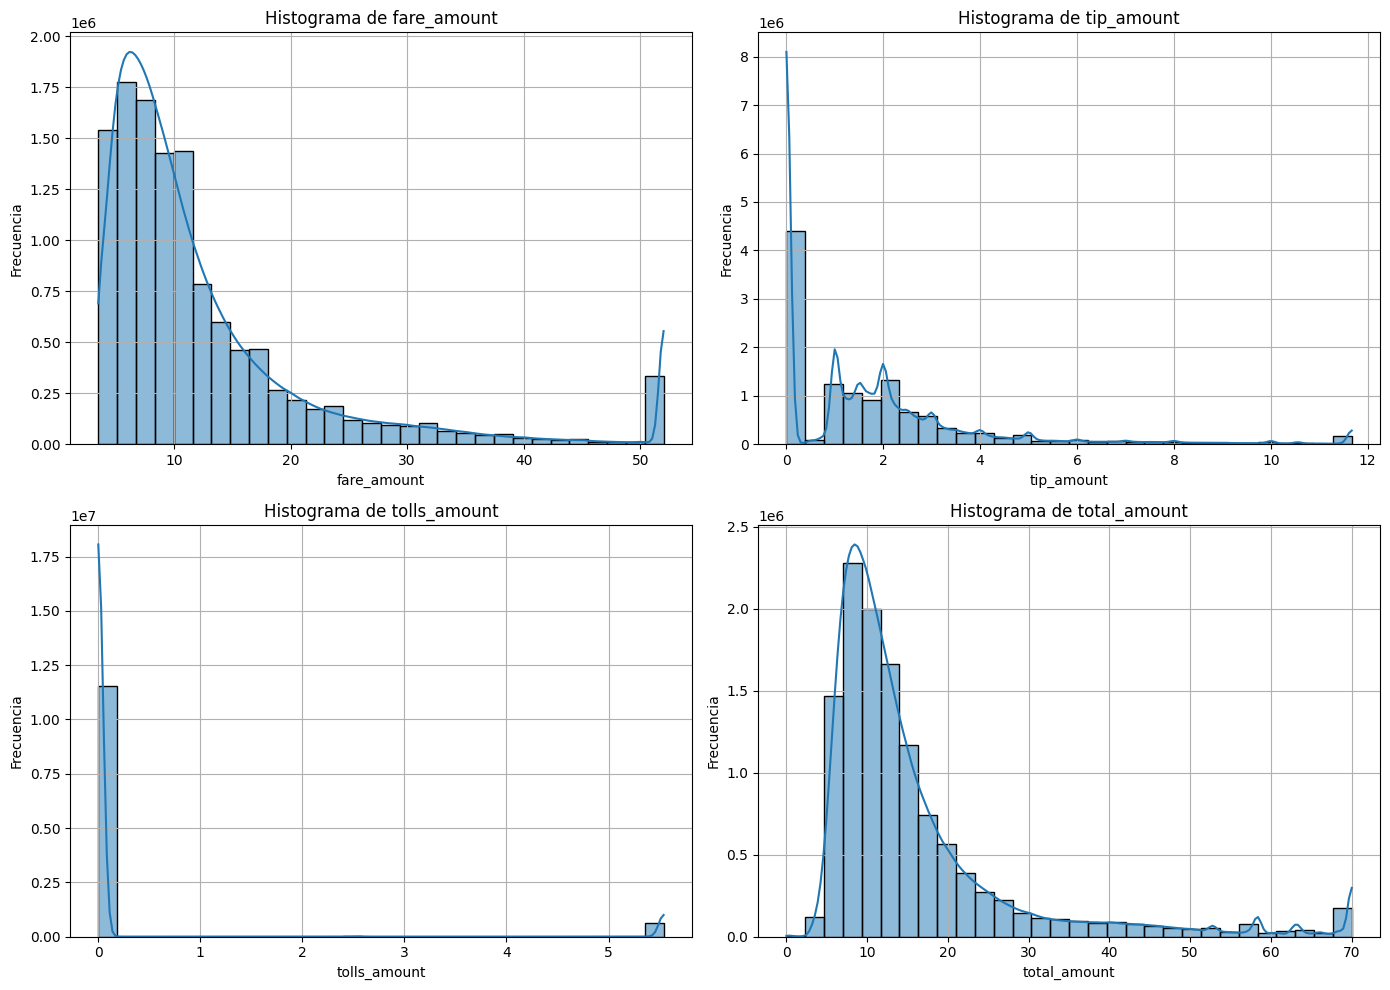

In [23]:
variables = ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']

# Crear un histograma para cada variable
plt.figure(figsize=(14, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)  # Gráficos en una cuadrícula de 2x2
    sns.histplot(df[var], bins=30, kde=True)  # Agregar una curva KDE (Kernel Density Estimation)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(True)

plt.tight_layout()  # Ajustar los gráficos para que no se sobrepongan
plt.show()